# **Τεχνολογία και Ανάλυση Εικόνων και Βίντεο**
## **ΣΗΜΜΥ, ΕΜΠ, Ροή Υ, 8ο Εξάμηνο**
### *2η Εργαστηριακή Άσκηση, 2021-2022*

    'Χρήστος Τσούφης - chris99ts@gmail.com'


### **1. Θεωρητικό μέρος**

**α) Μελετήστε τα ακόλουθα άρθρα καθώς και τις υλοποιήσεις τους.**

| Άρθρο      | Υλοποίηση |
| ----------- | ----------- |
| [Handwritten Digit Recognition with a Back-Propagation Network](https://papers.nips.cc/paper/1989/file/53c3bce66e43be4f209556518c2fcb54-Paper.pdf) | [6.6. Convolutional Neural Networks (LeNet) — Dive into Deep Learning 0.17.5 documentation](https://d2l.ai/chapter_convolutional-neural-networks/lenet.html) |
| [ImageNet Classification with Deep Convolutional Neural Networks](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) | [7.1. Deep Convolutional Neural Networks (AlexNet)](https://d2l.ai/chapter_convolutional-modern/alexnet.html) |
| [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/pdf/1409.1556.pdf) | [7.2. Networks Using Blocks (VGG) — Dive into Deep Learning 0.17.5 documentation](https://d2l.ai/chapter_convolutional-modern/vgg.html) |




**β) Απαντήστε στις ακόλουθες ερωτήσεις (μέσα σε κελί κειμένου στο Notebook που θα
παραδώσετε)**

**1. Περιγράψτε τη λειτουργία της Rectified Linear Unit (ReLU).**

Η Rectified Linear Unit (ReLU) είναι μια μη γραμμική συνάρτηση ενεργοποίησης, η οποία ορίζεται ως το θετικό μέρος του ορίσματός της: $ReLU(x) = max(0,x)$ , όπου x είναι η είσοδος του νευρώνα και, κατά την μοντελοποίηση του νευρωνικού δικτύου, εφαρμόζεται ξεχωριστά σε κάθε pixel του feautures map που παράχθηκε από το στάδιο της συνέλιξης. Με αυτόν τον τρόπο, αν κάποιο train_set παράγει θετική τιμή τότε θα πραγματοποιηθεί εκπαίδευση στο συγκεκριμένο νευρωνικό, διαφορετικά την θέτει ίση με μηδέν και αγνοεί το συγκεκριμένο νευρωνικό. Με άλλα λόγια,είναι μια scale invariant, εύκολα υλοποιήσιμη και αναλυτική συνάρτηση που περιλαμβάνει μόνο συγκρίσεις, πολλαπλασιασμούς και προσθέσεις.Συγκριτικά με άλλες μη γραμμικότητες ενεργοποίησης, καταφέρνει με τεχνικές gradient descent την εκπαίδευση νευρωνικών δικτύων πολύ ταχύτερα και αποδοτικότερα, αφού καθιστά εφικτή τη διαχείριση τεράστιων όγκων δεδομένων εκπαίδευσης. Επιπροσθέτως, επιτυγχάνει αραιή ενεργοποίηση (sparse activation) νευρώνων, καθώς μόνο το ~ 50% των νευρώνων λαμβάνουν μη μηδενική τιμή εξόδου. Έτσι, επιφέρει γρηγορότερη σύγκλιση των αλγορίθμων εκπαίδευσης, με αποτέλεσμα να περιορίζονται φαινόμενα overfitting και vanishing gradient.

**2. Παρουσιάστε ένα συγκριτικό πίνακα με τα επίπεδα, το μέγεθος των φίλτρων, συνάρτηση ενεργοποίησης, πλήθος παραμέτρων και τεχνικές pooling και dropout που χρησιμοποιούν τα 3 διαφορετικά δίκτυα που παρουσιάζονται στα προαναφερθέντα άρθρα και σχολιάστε επαρκώς τις διαφορές τους. Ποια χαρακτηριστικά αυτών των τριών δικτύων είναι κατά τη γνώμη σας αυτά που συνέβαλαν στη σταδιακή αύξηση της ακρίβειας ταξινόμησης.**

Ο **πίνακας** που προκύπτει είναι ο εξής:

| | LeNet | AlexNet | VGG |
| :-: | :-: | :-: | :-: |
|**Επίπεδα**| 7 layers | 8 layers  | 16 layers |
|**Μέγεθος Φίλτρων**| 5x5x3 kernel-sized filters | 11x11x3 & 5x5x3 & 3x3x3 kernel-sized filters | 3x3x3 kernel-sized filters |
|**Συνάρτηση Ενεργοποίησης**| Sigmoid | ReLU | ReLU, Softmax |
|**Πλήθος Παραμέτρων**| 3,246 | 62 million | 138 million |
|**Τεχνικές Pooling**| average-pooling of size 2x2 with a stride of 2 | max-pooling of size 3×3 with a stride of 2 | max-pooling of size 2 × 2 with strides of 2 |
|**Τεχνικές Dropout**| - | Yes (p = 50%) | - |

<br>

**Σχολιασμός**

---

Παρατηρούνται τα εξής:
- **Lenet**: είναι η πιο πρώιμη μορφή συνελικτικού δικτύου. Έχει τα λιγότερα επίπεδα και τις λιγότερες εκπαιδεύσιμες παραμέτρους. Είναι το μόνο εκ των τριών που δεν χρησιμοποιεί την συνάρτηση ReLU, αλλά τη sigmoid. Επιπλέον, είναι το μόνο που χρησιμοποιεί τεχνική average-pooling αντί για max-pooling. Τέλος, σημειώνεται ότι η αρχική λειτουργία του εν λόγω δικτύου προοριζόταν για πρόβλημα κατηγοριοποίησης εικόνων μόλις 10 κλάσεων (ψηφία 0-9), για αυτό το λόγο έχει και απλούστερη αρχιτεκτονική.
- **AlexNet**: χρησιμοποιεί τα μεγαλύτερα φίλτρα (σε διάσταση) και επίσης, είναι το μόνο που χρησιμοποιεί τριών διαστάσεων φίλτρα ανά επίπεδο (δηλ. 11x11, 5x5, 3x3). Αυτό συμβαίνει διότι λαμβάνει ως είσοδο εικόνες μεγάλων διαστάσεων (224x224 pixels). Ακόμη, είναι το πρώτο που αξιοποιεί τη μη γραμμικότητα της ReLU. Επίσης, είναι το μοναδικό εκ των τριών που κάνει χρήση τεχνικών Dropout για την αντιμετώπιση φαινομένων overfitting. Το Dropout, αφαιρώντας ουσιαστικά τυχαίους κόμβους από την διαδικασία εκπαίδευσης κάθε φορά, έχει ως αποτέλεσμα ότι ένας νευρώνας δεν μπορεί τελικά να βασίζεται σημαντικά σε έναν άλλο, αφού οι συνδέσεις δεν είναι πάντα σταθερές, και οδηγεί τελικά σε σημαντική μείωση του overfitting.
- **VGG**: είναι το μεγαλύτερο δίκτυο (σε βάθος), αφού έχει πολλά επίπεδα και παραμέτρους. Συνεπώς, είναι πιο αργό κατά την εκπαίδευση, ενώ φαίνεται να λειτουργεί καλύτερα με Stochastic Gradient Descent Optimizers. Μάλιστα, χρησιμοποιεί πολλαπλά stacked 3x3 convolutional layers αντί για ένα μεγαλύτερο, το οποίο είναι ιδιαίτερα χρήσιμο για την βελτίωση της επίδοσης του, γεγονός που αντιστοιχεί σε ένα είδος regularization, ενώ παράλληλα, επιτρέπει και την μείωση του πλήθους των παραμέτρων που πρέπει να προσδιοριστούν. Τέλος, είναι το μόνο δίκτυο που στο τελευταίο layer χρησιμοποιεί την συνάρτηση ενεργοποίησης Softmax.

Εν κατακλείδι, η σταδιακή αύξηση της ακρίβειας ταξινόμησης οφείλεται, κατά κύριο λόγο, στη χρήση συναρτήσεων ενεργοποίησης, καθώς μέσω αυτών μοντελοποιείται η μη γραμμικότητα του προβλήματος. Επιπροσθέτως, η διαδικασία εκπαίδευσης καθίσταται ευκολότερη με την αξιοποίηση πολλαπλών επιπέδων εκπαίδευσης, καθώς εισάγονται/εξάγονται απευθείας ολόκληρες εικόνες, οι οποίες "αποσυντίθενται" εντός του νευρωνικού σε επιμέρους features και εξυπηρετούν classification tasks. Επίσης, το πλήθος των παραμέτρων διατηρείται όσο το δυνατόν ελάχιστο, ώστε η εκπαίδευση τους να γίνεται γρήγορα και αξιοποιώντας τεχνολογίες GPU. Τέλος, τα αυξημένα ποσοστά ευστοχίας οφείλονται στο γεγονός ότι και οι τρεις αρχιτεκτονικές μπορούν εύκολα να προσαρμοστούν με την εισαγωγή και τροποποίηση επιπέδων καθώς και τεχνικών pooling & Dropout που φάνηκαν ιδιαίτερα αποτελεσματικές στην αντιμετώπιση φαινομένων overfitting & vanishing gradient.

### **2. Υλοποίηση αλγορίθμου**

Σας δίνεται ένα [αρχικό notebook](https://colab.research.google.com/drive/1Ct0hTXIgtKCn8_SA-N8mNZt2Tc1ehyG7) για την εισαγωγή και επισκόπηση του συνόλου των δεδομένων που θα χρησιμοποιήσετε στην άσκηση. Θα δουλέψετε με ένα υποσύνολο του συνόλου δεδομένων [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html). Στο αρχικό notebook υπάρχει η παράμετρο team_seed όπου θα της ορίσετε ως τιμή τον αριθμό της ομάδας σας (π.χ. Αν Μ25 τότε team_seed=25) με σκοπό να λάβετε το υποσύνολο που αντιστοιχεί με μοναδικό τρόπο στην ομάδα σας.

Αποθηκεύστε αυτό το notebook στο drive σας και ακολουθήστε τα βήματα που παρουσιάζονται σε αυτό. Καλείστε να υλοποιήσετε κώδικα και να απαντήσετε στα σχετικά ερωτήματα.

Το παραδοτέο θα είναι ένα .ipynb αρχείο όπου θα περιλαμβάνει τα εξής:
1. τις απαντήσεις του θεωρητικού μέρους (σε markdown - text κελί).
2. τις υλοποιήσεις των συναρτήσεων του εργαστηριακού μέρους (σε code κελί) και σε markdown-text κελί τους σχολιασμούς των αποτελεσμάτων σας.

Προσοχή: Θα πρέπει να έχετε αποθηκεύσει το αρχείο ipynb έχοντας τυπωμένη όλη την εκτέλεσή του (δηλαδή να το τρέξετε και να το αποθηκεύσετε και να το “κατεβάσετε” από το cloud έτσι ώστε να είναι εμφανής η εκτέλεσή του). Όσοι επιθυμούν, αντί για ανέβασμα του notebook τους στο eclass, μπορούν να διαμοιράσουν το notebook της εργασίας του και να ανεβάζουν το link στο eclass (δεν θα ληφθούν υπόψη αλλαγές που θα γίνουν μετά την ημερομηνία υποβολής της εργασίας τους στο eclass).

Installation of packages & libraries

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

import datetime
# data augmentation
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The following cell implements some helper functions

The following cell selects from from_list elements with index in index_list

In [ ]:
def select_from_list(from_list, index_list):
    filtered_list= [from_list[i] for i in index_list]
    return(filtered_list)

The following cell appends in filtered_list the index of each element of unfilterd_list if it exists in in target_list


In [ ]:
def get_ds_index(unfiliterd_list, target_list):
    index = 0
    filtered_list = []
    for i_ in unfiliterd_list:
        if i_[0] in target_list:
            filtered_list.append(index)
        index += 1
    return(filtered_list)

The following cell plots learning curve of model history

In [ ]:
def plot_accuracy(history):
    plt.figure(figsize=(8, 5))
    plt.title('Classification Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='val')
    plt.legend(loc='upper right')
    return plt

The following cell evaluates Model on its Accuracy


In [ ]:
def model_evaluation(model, eval_steps):
    print('\nTest set Evaluation metrics')
    loss, accuracy = model.evaluate(x_test, y_test, steps = eval_steps)
    print("Loss: {:.2f}".format(loss))
    print("Accuracy: {:.2f}".format(accuracy))

Load the entire dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169017344/169001437 [==============================] - 2s 0us/step


In [ ]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 83

In [ ]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"
classes_num = 20

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

[' baby', ' boy', ' butterfly', ' can', ' crab', ' fox', ' house', ' lamp', ' lawn_mower', ' pickup_truck', ' porcupine', ' skyscraper', ' snail', ' sunflower', ' telephone', ' television', ' tractor', ' train', ' wardrobe', ' woman']


In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


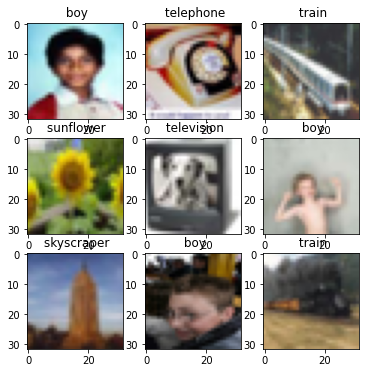

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
    return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    #show the figure
plt.show()

In [ ]:
# Map Image Labels to [0, classes_num-1] = [0, 19]
def create_dictionary(label_ds):
    dictionary = {}
    i = 0
    for label in label_ds:
        if label not in dictionary.keys():
          dictionary[label] = i
          i+=1
    return dictionary

def mapping(label_ds,dictionary): 
    return [dictionary[x] for x in label_ds]

In [ ]:
# Create Label Dict
label_dict = create_dictionary(y_train.reshape(1,-1)[0])
# Apply mapping
y_train = mapping(y_train.reshape(1,-1)[0], label_dict)
y_test = mapping(y_test.reshape(1,-1)[0], label_dict)
y_val = mapping(y_val.reshape(1,-1)[0], label_dict)

y_train = np.array([[i] for i in y_train])
y_test = np.array([[i] for i in y_test])
y_val = np.array([[i] for i in y_val])

### Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).


In [ ]:
(ds_train, ds_test), ds_info = tfds.load('cifar100', split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info=True)
assert isinstance(ds_train, tf.data.Dataset)
assert isinstance(ds_test, tf.data.Dataset)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar100/3.0.2.incomplete3198WI/cifar100-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar100/3.0.2.incomplete3198WI/cifar100-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar100 downloaded and prepared to /root/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.


### **Ερώτημα 1**

#### **Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων**

 1. Σχεδίαστε, μεταγλωττίστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας διαφορετικούς συνδυασμούς (τουλάχιστον 2 ανά μοντέλο) για [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/), batch size και epoch.  Για [metrics](https://keras.io/api/metrics/) να χρησιμοποιήσετε την ορθότητα (όπως στο Lab8.1).

#### **LeNet Model**

Σημειώνεται ότι ως συνάρτηση ενεργοποίησης επιλέχθηκε η ReLU και όχι η Sigmoid, με την οποία ορίστηκε το Lenet στο Θεωρητικό Μέρος, καθώς η πρώτη αποδίδει πολύ καλύτερα σε τεχνικές gradient descent (SGD optimizer).

In [ ]:
def LeNet_model(combination = 1):
  
    if combination == 1:
        optimizer = 'adam'
        loss = tf.keras.losses.sparse_categorical_crossentropy
    else:
        optimizer = 'sgd'
        loss = tf.keras.losses.sparse_categorical_crossentropy

    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(32, 32, 3)))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='sigmoid'))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='sigmoid'))
    model.add(layers.Dense(84, activation='sigmoid'))
    model.add(layers.Dense(classes_num, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
    
    model.summary()

    return model

1st Combination of LeNet Model - Adam Optimizer, Cross Entropy Loss


In [ ]:
LeNet1 = LeNet_model(combination=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 32)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 120)               1

In [ ]:
model_history1 = LeNet1.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_val, y_val))
LeNet1.save('lenet1.h5')

Epoch 1/30
133/133 [==============================] - 12s 7ms/step - loss: 3.0098 - accuracy: 0.0471 - val_loss: 3.0060 - val_accuracy: 0.0513
Epoch 2/30
133/133 [==============================] - 1s 5ms/step - loss: 3.0041 - accuracy: 0.0480 - val_loss: 3.0034 - val_accuracy: 0.0427
Epoch 3/30
133/133 [==============================] - 1s 5ms/step - loss: 3.0045 - accuracy: 0.0481 - val_loss: 3.0097 - val_accuracy: 0.0553
Epoch 4/30
133/133 [==============================] - 1s 5ms/step - loss: 3.0042 - accuracy: 0.0498 - val_loss: 3.0041 - val_accuracy: 0.0520
Epoch 5/30
133/133 [==============================] - 1s 5ms/step - loss: 3.0034 - accuracy: 0.0474 - val_loss: 3.0042 - val_accuracy: 0.0387
Epoch 6/30
133/133 [==============================] - 1s 5ms/step - loss: 3.0021 - accuracy: 0.0512 - val_loss: 2.9999 - val_accuracy: 0.0547
Epoch 7/30
133/133 [==============================] - 1s 5ms/step - loss: 2.9975 - accuracy: 0.0522 - val_loss: 2.9558 - val_accuracy: 0.0753
Epoch

2nd Combination of LeNet Model - Stochastic Gradient Descent Optimizer, Cross Entropy Loss

In [ ]:
LeNet2 = LeNet_model(combination=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d_2 (Averag  (None, 15, 15, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 average_pooling2d_3 (Averag  (None, 6, 6, 32)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [ ]:
model_history2 = LeNet2.fit(x_train, y_train, epochs=50, batch_size=256, validation_data=(x_val, y_val))
LeNet2.save('lenet2.h5')

Epoch 1/50
34/34 [==============================] - 1s 17ms/step - loss: 3.1312 - accuracy: 0.0508 - val_loss: 3.0588 - val_accuracy: 0.0453
Epoch 2/50
34/34 [==============================] - 0s 8ms/step - loss: 3.0566 - accuracy: 0.0508 - val_loss: 3.0196 - val_accuracy: 0.0453
Epoch 3/50
34/34 [==============================] - 0s 8ms/step - loss: 3.0237 - accuracy: 0.0508 - val_loss: 3.0038 - val_accuracy: 0.0453
Epoch 4/50
34/34 [==============================] - 0s 8ms/step - loss: 3.0084 - accuracy: 0.0508 - val_loss: 2.9979 - val_accuracy: 0.0453
Epoch 5/50
34/34 [==============================] - 0s 8ms/step - loss: 3.0012 - accuracy: 0.0475 - val_loss: 2.9961 - val_accuracy: 0.0453
Epoch 6/50
34/34 [==============================] - 0s 8ms/step - loss: 2.9980 - accuracy: 0.0518 - val_loss: 2.9962 - val_accuracy: 0.0407
Epoch 7/50
34/34 [==============================] - 0s 8ms/step - loss: 2.9968 - accuracy: 0.0514 - val_loss: 2.9967 - val_accuracy: 0.0407
Epoch 8/50
34/34 [=

#### **AlexNet Model**

In [ ]:
def AlexNet_model(combination = 1):
  
    if combination == 1:
        optimizer = 'adam'
        loss = tf.keras.losses.sparse_categorical_crossentropy
    else:
        optimizer = 'sgd'
        loss = tf.keras.losses.sparse_categorical_crossentropy
  
    model = models.Sequential()
    model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
    model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.Lambda(tf.nn.local_response_normalization))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(3, strides=2))
    model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.Lambda(tf.nn.local_response_normalization))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(3, strides=2))
    model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.Activation('relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes_num, activation='softmax'))

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    model.summary()
    
    return model

1st Combination of AlexNet Model

In [ ]:
AlexNet1 = AlexNet_model(combination=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 96)       384       
 ormalization)                                                   
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                    

In [ ]:
model_history3 = AlexNet1.fit(x_train, y_train,  epochs=15, validation_data=(x_val, y_val))
AlexNet1.save('alexnet1.h5')

Epoch 1/15
266/266 [==============================] - 20s 70ms/step - loss: 2.5106 - accuracy: 0.2394 - val_loss: 2.1834 - val_accuracy: 0.3253
Epoch 2/15
266/266 [==============================] - 18s 69ms/step - loss: 2.1661 - accuracy: 0.3369 - val_loss: 2.0403 - val_accuracy: 0.3527
Epoch 3/15
266/266 [==============================] - 18s 68ms/step - loss: 1.9226 - accuracy: 0.4066 - val_loss: 1.9097 - val_accuracy: 0.4200
Epoch 4/15
266/266 [==============================] - 18s 68ms/step - loss: 1.7229 - accuracy: 0.4724 - val_loss: 1.8007 - val_accuracy: 0.4380
Epoch 5/15
266/266 [==============================] - 18s 68ms/step - loss: 1.5506 - accuracy: 0.5178 - val_loss: 1.7915 - val_accuracy: 0.4827
Epoch 6/15
266/266 [==============================] - 18s 68ms/step - loss: 1.4117 - accuracy: 0.5619 - val_loss: 1.5633 - val_accuracy: 0.5313
Epoch 7/15
266/266 [==============================] - 18s 68ms/step - loss: 1.2891 - accuracy: 0.6008 - val_loss: 1.4644 - val_accuracy:

2nd Combination of AlexNet Model

In [ ]:
AlexNet2 = AlexNet_model(combination=2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization_5 (Batc  (None, 56, 56, 96)       384       
 hNormalization)                                                 
                                                                 
 lambda_2 (Lambda)           (None, 56, 56, 96)        0         
                                                                 
 activation_5 (Activation)   (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                  

In [ ]:
model_history4 = AlexNet2.fit(x_train, y_train,  epochs=25, validation_data=(x_val, y_val))
AlexNet2.save('alexnet2.h5')

Epoch 1/25
266/266 [==============================] - 18s 67ms/step - loss: 2.6933 - accuracy: 0.1813 - val_loss: 2.3516 - val_accuracy: 0.2813
Epoch 2/25
266/266 [==============================] - 17s 66ms/step - loss: 2.1891 - accuracy: 0.3198 - val_loss: 2.0136 - val_accuracy: 0.3747
Epoch 3/25
266/266 [==============================] - 18s 66ms/step - loss: 1.9001 - accuracy: 0.4068 - val_loss: 1.9068 - val_accuracy: 0.4113
Epoch 4/25
266/266 [==============================] - 17s 66ms/step - loss: 1.6607 - accuracy: 0.4796 - val_loss: 2.1394 - val_accuracy: 0.3747
Epoch 5/25
266/266 [==============================] - 18s 66ms/step - loss: 1.4513 - accuracy: 0.5365 - val_loss: 2.0369 - val_accuracy: 0.4100
Epoch 6/25
266/266 [==============================] - 17s 66ms/step - loss: 1.2543 - accuracy: 0.5974 - val_loss: 1.8800 - val_accuracy: 0.4400
Epoch 7/25
266/266 [==============================] - 18s 66ms/step - loss: 1.0709 - accuracy: 0.6579 - val_loss: 2.2384 - val_accuracy:

#### **VGG Model**

In [ ]:
def VGG_model(combination = 1):

    if combination == 1:
        optimizer = 'adam'
        loss = tf.keras.losses.sparse_categorical_crossentropy
    else:
        optimizer = 'sgd'
        loss = tf.keras.losses.sparse_categorical_crossentropy

    model = models.Sequential()
    model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
    model.add(layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=4096,activation="relu"))
    model.add(layers.Dense(units=4096,activation="relu"))
    model.add(layers.Dense(classes_num, activation="softmax"))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    model.summary()
    
    return model

1st Combination of VGG Model - Adam optimizer, sparse categorical crossentropy loss

In [ ]:
vgg1 = VGG_model(1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_2 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_10 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_11 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)    

In [ ]:
model_history5 = vgg1.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_val, y_val))
vgg1.save('vgg1.h5')

Epoch 1/15
133/133 [==============================] - 182s 1s/step - loss: 8.4368 - accuracy: 0.1745 - val_loss: 2.8384 - val_accuracy: 0.2113
Epoch 2/15
133/133 [==============================] - 141s 1s/step - loss: 2.5498 - accuracy: 0.2434 - val_loss: 2.4128 - val_accuracy: 0.2853
Epoch 3/15
133/133 [==============================] - 141s 1s/step - loss: 2.3247 - accuracy: 0.2959 - val_loss: 2.2948 - val_accuracy: 0.3173
Epoch 4/15
133/133 [==============================] - 141s 1s/step - loss: 2.1510 - accuracy: 0.3411 - val_loss: 2.1709 - val_accuracy: 0.3440
Epoch 5/15
133/133 [==============================] - 141s 1s/step - loss: 2.0423 - accuracy: 0.3689 - val_loss: 2.1757 - val_accuracy: 0.3507
Epoch 6/15
133/133 [==============================] - 141s 1s/step - loss: 1.8946 - accuracy: 0.4107 - val_loss: 2.1958 - val_accuracy: 0.3553
Epoch 7/15
133/133 [==============================] - 141s 1s/step - loss: 1.7491 - accuracy: 0.4540 - val_loss: 2.1206 - val_accuracy: 0.3707

2nd Combination of VGG Model - Adam optimizer, categorical crossentropy loss

In [ ]:
vgg2 = VGG_model(2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_23 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_28 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_24 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 64)    

In [ ]:
model_history6 = vgg2.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))
vgg2.save('vgg2.h5')

Epoch 1/20
133/133 [==============================] - 142s 1s/step - loss: 2.5305 - accuracy: 0.2949 - val_loss: 2.1115 - val_accuracy: 0.3727
Epoch 2/20
133/133 [==============================] - 140s 1s/step - loss: 1.6421 - accuracy: 0.4887 - val_loss: 1.7315 - val_accuracy: 0.4780
Epoch 3/20
133/133 [==============================] - 140s 1s/step - loss: 1.1277 - accuracy: 0.6445 - val_loss: 1.6173 - val_accuracy: 0.5100
Epoch 4/20
133/133 [==============================] - 141s 1s/step - loss: 0.6638 - accuracy: 0.8088 - val_loss: 1.6296 - val_accuracy: 0.5120
Epoch 5/20
133/133 [==============================] - 140s 1s/step - loss: 0.3031 - accuracy: 0.9382 - val_loss: 1.5957 - val_accuracy: 0.5427
Epoch 6/20
133/133 [==============================] - 141s 1s/step - loss: 0.1108 - accuracy: 0.9880 - val_loss: 1.5927 - val_accuracy: 0.5547
Epoch 7/20
133/133 [==============================] - 140s 1s/step - loss: 0.0483 - accuracy: 0.9980 - val_loss: 1.5549 - val_accuracy: 0.5660

**Σχολιασμός**

---

Παρατηρείται ότι:
- Στο LeNet, στο 1st Combination, με τη χρήση του Adam optimizer, επιτυγχάνονται καλύτερα αποτελέσματα, ενώ ο SGD optimizer αποτυγχάνει, καθώς γίνεται χρήση της μη γραμμικής συνάρτησης Sigmoid, η οποία δεν ενδείκνυται για τεχνικές gradient descent. Επίσης, φαίνεται πως η ReLU γενικά αποδίδει και με optimizers SGD.
- Στο VGG, ο SGD optimizer φαίνεται να παρέχει καλύτερα ποσοστά ευστοχίας, γεγονός που οφείλεται στην εσωτερική αρχιτεκτονική πολλών επιπέδων του συγκεκριμένου δικτύου.

#### **My CNN Model**

Στην συνέχεια δημιουργείται ένα CNN, το οποίο αποτελείται από convolutional layers το μέγεθος των οποίων σταδιακά μειώνεται, ενώ ανάμεσά τους παρεμβάλλονται max-pooling layers και μη γραμμικές συναρτήσεις ενεργοποίησης της μορφής Leaky ReLU. Έτσι, δεν χρειάζεται να ανησυχεί κανείς για την αρχικοποίηση του δικτύου ή την κανονικοποίηση των δεδομένων εισόδου.

In [ ]:
def MyCNN(combination = 1):

    if combination == 1:
        optimizer = 'adam'
        loss = tf.keras.losses.sparse_categorical_crossentropy
    else:
        optimizer = 'adagrad'
        loss = tf.keras.losses.sparse_categorical_crossentropy

    model = models.Sequential()
    model.add(layers.Conv2D(128, (3,3), padding="same",input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.Conv2D(256, (3, 3)))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1024))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.Dense(200))
    model.add(layers.Dense(classes_num, activation='softmax'))

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    model.summary()
    
    return model

1st Combination of My CNN Model

In [ ]:
mycnn1 = MyCNN(1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 128)       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 256)       295168    
                                                      

In [ ]:
model_history7 = mycnn1.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))
mycnn1.save('mycnn1.h5')

Epoch 1/10
67/67 [==============================] - 6s 67ms/step - loss: 2.7259 - accuracy: 0.1672 - val_loss: 2.3350 - val_accuracy: 0.2933
Epoch 2/10
67/67 [==============================] - 3s 48ms/step - loss: 2.0870 - accuracy: 0.3524 - val_loss: 1.9496 - val_accuracy: 0.4107
Epoch 3/10
67/67 [==============================] - 3s 48ms/step - loss: 1.7207 - accuracy: 0.4571 - val_loss: 1.8108 - val_accuracy: 0.4600
Epoch 4/10
67/67 [==============================] - 3s 48ms/step - loss: 1.4464 - accuracy: 0.5375 - val_loss: 1.4739 - val_accuracy: 0.5527
Epoch 5/10
67/67 [==============================] - 3s 48ms/step - loss: 1.1587 - accuracy: 0.6269 - val_loss: 1.3753 - val_accuracy: 0.5793
Epoch 6/10
67/67 [==============================] - 3s 50ms/step - loss: 0.9527 - accuracy: 0.6895 - val_loss: 1.3260 - val_accuracy: 0.6060
Epoch 7/10
67/67 [==============================] - 3s 48ms/step - loss: 0.7586 - accuracy: 0.7496 - val_loss: 1.2868 - val_accuracy: 0.6287
Epoch 8/10
67

2nd Combination of My CNN Model

In [ ]:
mycnn2 = MyCNN(2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 16, 16, 256)       295168    
                                                      

In [ ]:
model_history8 = mycnn2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))
mycnn2.save('mycnn2.h5')

Epoch 1/10
133/133 [==============================] - 5s 29ms/step - loss: 2.9923 - accuracy: 0.0751 - val_loss: 2.9917 - val_accuracy: 0.0853
Epoch 2/10
133/133 [==============================] - 3s 26ms/step - loss: 2.9868 - accuracy: 0.0845 - val_loss: 2.9860 - val_accuracy: 0.0833
Epoch 3/10
133/133 [==============================] - 3s 26ms/step - loss: 2.9807 - accuracy: 0.0875 - val_loss: 2.9791 - val_accuracy: 0.0953
Epoch 4/10
133/133 [==============================] - 3s 26ms/step - loss: 2.9723 - accuracy: 0.0987 - val_loss: 2.9691 - val_accuracy: 0.1080
Epoch 5/10
133/133 [==============================] - 4s 27ms/step - loss: 2.9596 - accuracy: 0.1032 - val_loss: 2.9525 - val_accuracy: 0.1380
Epoch 6/10
133/133 [==============================] - 4s 27ms/step - loss: 2.9368 - accuracy: 0.1253 - val_loss: 2.9176 - val_accuracy: 0.1640
Epoch 7/10
133/133 [==============================] - 4s 27ms/step - loss: 2.8912 - accuracy: 0.1520 - val_loss: 2.8509 - val_accuracy: 0.1700

#### **Βήμα 2: Αξιολόγηση των μοντέλων**

1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1 και επιλέξτε αυτό με την καλύτερη ορθότητα από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 4).
2. Για κάθε ένα από τα μοντέλα με την καλύτερη ορθότητα (συνολικά **4**), απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών.
3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)

#### **LeNet Model**

1st combination of LeNet Model

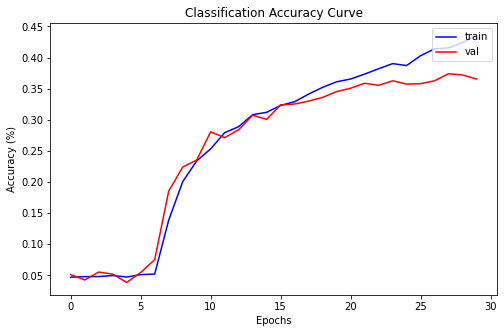

In [ ]:
plot_accuracy(model_history1)
plt.show()

2nd combination of LeNet Model

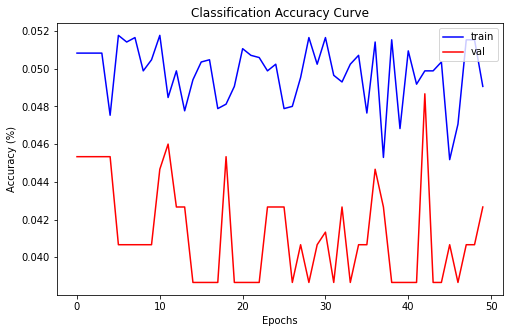

In [ ]:
plot_accuracy(model_history2)
plt.show()

#### **AlexNet Model**

1st combination of AlexNet Model

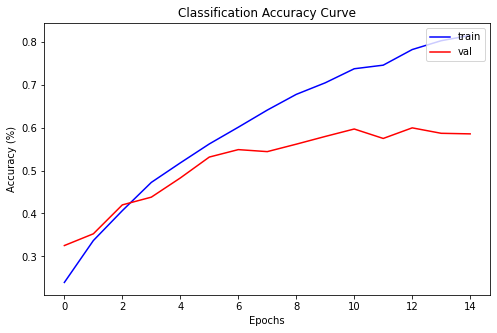

In [ ]:
plot_accuracy(model_history3)
plt.show()

2nd combination of AlexNet Model

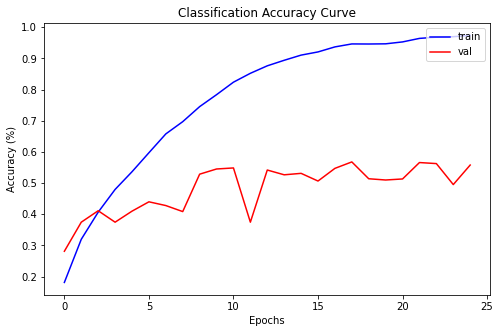

In [ ]:
plot_accuracy(model_history4)
plt.show()

#### **VGG Model**

1st combination of VGG Model

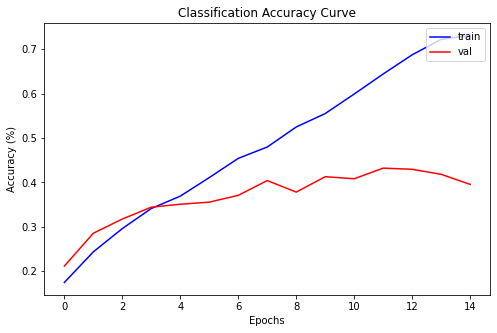

In [ ]:
plot_accuracy(model_history5)
plt.show()

2nd combination of VGG Model

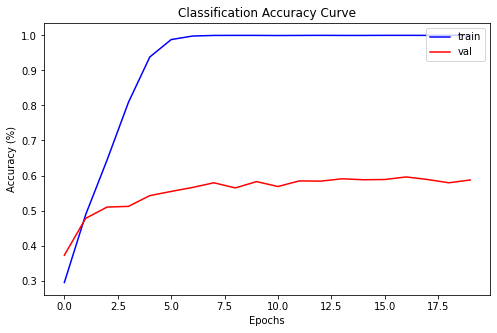

In [ ]:
plot_accuracy(model_history6)
plt.show()

#### **My CNN Model**

1st combination of My CNN Model

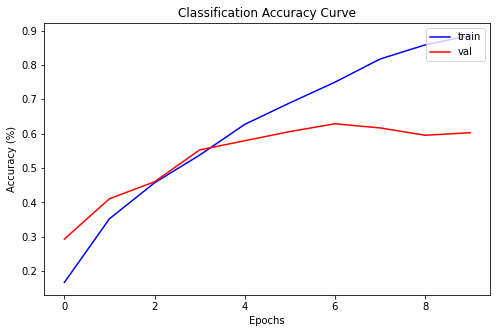

In [ ]:
plot_accuracy(model_history7)
plt.show()

2nd combination of My CNN Model

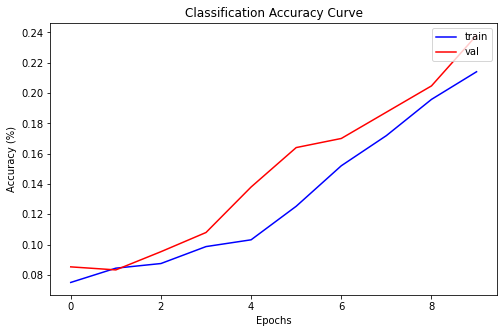

In [ ]:
plot_accuracy(model_history8)
plt.show()

**Σχολιασμός**

---

Παρατηρείται ότι:
- LeNet: ο 1st Combination για το Lenet δίνει καλύτερο αποτελέσματα ευστοχίας, ενώ ο 2nd Combination αποτυγχάνει, καθώς χρησιμοποιείται η sigmoid με μεθόδους gradient descent.
- AlexNet: Ομοίως με το πρώτο μοντέλο, ο Adam optimizer υπερτερεί του SGD, ο οποίος φαίνεται να οδηγεί το μοντέλο πιο γρήγορο προς φαινόμενα overfitting.
- VGG: σε αντίθεση με τα δύο πρώτα μοντέλα, ο 2nd Combination με τον SGD optimizer φαίνεται να δίνει καλύτερα ποσοστά ευστοχίας.
- My CNN: ο 1st Combination για το MyCNN δίνει καλύτερο αποτελέσματα accuracy.

#### **Ευστοχία Μοντέλων σε Κοινό Διάγραμμα**

Έπειτα, σε κοινό διάγραμμα σχεδιάζονται οι καμπύλες ευστοχίας για όλα τα μοντέλα που εκπαιδεύτηκαν ανά εποχή - τόσο για το train dataset όσο και για το validation set. 

Για κάθε μοντέλο, διατηρείται η παραμετροποίηση με τα καλύτερα ποσοστά ευστοχίας.

In [ ]:
def plot_all(histories, labels):
    fig = plt.figure(figsize=(9,9))
    plt.title("Train and Validation Accuracy of Neural Network Models")
    i=0
    colors = ['b','r','g','m','y']
    for history in histories:
        plt.plot(history.history['accuracy'], label=labels[i]+': accuracy', color=colors[i%5])
        plt.plot(history.history['val_accuracy'], linestyle='dashed', label = labels[i] + ': val_accuracy',color=colors[i%5])
        i+=1

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

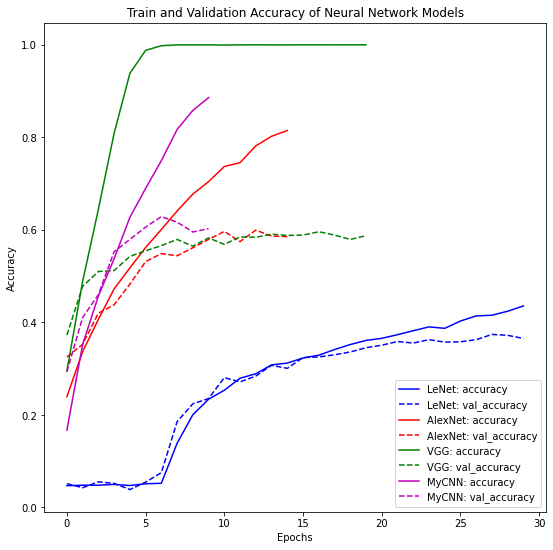

In [ ]:
plot_all([model_history1, model_history3, model_history6, model_history7], ['LeNet','AlexNet','VGG','MyCNN'])

**Σχολιασμός**

---

- **Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου:**<br> Παρατηρείται ότι, όπως είναι γνωστό από την θεωρία, αυξάνοντας το πλήθος των εικόνων εισόδου της βάσης CIFAR-100 για την εκπαίδευση του CNN, η απόδοση του δικτύου μειώνεται, ενώ αυξάνεται ο χρόνος που απαιτείται για την ολοκλήρωση κάθε εποχής. Αυτό συμβαίνει διότι, εισάγοντας περισσότερες εικόνες δημιουργούνται επιπλέον κλάσεις και άρα το πρόβλημα του image classification γίνεται πιο σύνθετο (επιτάσσει τη χρήση μεγαλύτερων training sets), επιφέροντας μικρότερη ευστοχία. Δηλαδή, όσον αφορά το πλήθος των δεδομένων, οδηγεί σε μεγαλύτερη ακρίβεια μιας και όταν υπάρχει ένας μικρός αριθμός παραδειγμάτων εκπαίδευσης το μοντέλο μερικές φορές μαθαίνει από θορύβους ή ανεπιθύμητες λεπτομέρειες από παραδείγματα του συνόλου εκπαίδευσης σε βαθμό που επηρεάζει αρνητικά την απόδοση του μοντέλου σε νέα παραδείγματα (overfitting). Αναφορικά με το πλήθος των κλάσεων, όσο περισσότερες κλάσεις έχουμε τόσο μειώνεται η ακρίβεια, καθώς με την αύξηση του αριθμού των κλάσεων, εικόνες που ανήκουν σε κλάσεις οι οποίες έχουν αρκετά κοινά στοιχεία είναι πιο δύσκολο να ταξινομηθούν μιας και αυξάνονται οι λεπτομέρειες οι οποίες οφείλονται για τον διαχωρισμό αυτό. Επιπλέον, η φόρτωση επιπλέον εικόνων επιβαρύνει αισθητά τη μνήμη του συστήματος και άρα την ταχύτητα εκπαίδευσης του δικτύου, γι'αυτό και όπως θα φανεί στη συνέχεια προτιμάται η χρήση κάποιας μεθόδου data augmentation.

- **Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer):**<br>
Στα πειράματα, φάνηκε ότι από τους optimizers Adam, Adamax, Nadam και RMSprop, ο optimizer Adam έδωσε πολύ καλύτερα αποτελέσματα από τους υπόλοιπους οδηγώντας σε μεγαλύτερες τιμές accuracy ενώ αντίθετα οι υπόλοιποι optimizers έδωσαν ένα χαμηλό accuracy. Μάλιστα, ο Adam optimizer επιτυγχάνει πιο γρήγορη σύγκλιση σε σύγκριση με τον SGD Optimizer, ο οποίος απαιτεί τη διέλευση πολλών εποχών για την επίτευξη ικανοποιητικών ποσοστών ευστοχίας. Επιπλέον, με εξαίρεση το VGG δίκτυο, o Adam optimizer επιφέρει καλύτερα ποσοστά ευστοχίας από τον SGD, ο οποίος πιο εύκολα "εγκλωβίζεται" σε τοπικά ελάχιστα της συνάρτησης κόστους ή σε φαινόμενα overfitting. Σημειώνεται ακόμη ότι ο Adagrad optimizer επιτυγχάνει μεγαλύτερη ευρωστία από τον SGD. Όσον αφορά την μορφή που έχει η γραφική παράσταση για κάθε optimizer, παρατηρείται ότι για όλους τους optimizers η ευθεία της ορθότητας εκπαίδευσης δεν είχε απότομες μεταβολές, αλλά η ευθεία της ορθότητας επικύρωσης είχε έντονες μεταβολές στις περισσότερες περιπτώσεις για τον optimizer Adam και ήταν ομαλή για τους υπολοίπους optimizers. Υπογραμμίζεται ότι η μορφή των ευθειών έχει να κάνει με το πόσο γρήγορα κλιμακώνει η εκάστοτε ορθότητα και αν παρουσιάζει έντονες αυξομοιώσεις κατά την διάρκεια της μεταγλώττισης που μπορεί να οφείλονται σε δυσκολίες εκπαίδευσης του νευρωνικού για συγκεκριμένες κλάσεις.

- **Επίδραση του μεγέθους δέσμης (batch size):**<br>
Είναι γνωστό ότι αυξάνοντας το batch size (μέγεθος παρτίδας: το πλήθος των δειγμάτων εκπαίδευσης σε ένα πέρασμα εμπρός / πίσω) παρατηρείται ότι η εκπαίδευση του νευρωνικού ανά εποχή τερματίζει πιο γρήγορα, ωστόσο η συνολική σύγκλιση σε ικανοποιητικά ποσοστά ευστοχίας επιβραδύνεται. Αυτό έχει σαν αποτέλεσμα για μεγαλύτερο batch size να χρειάζονται λιγότερες επαναλήψεις ανά epoch και άρα μεγαλύτερη ταχύτητα στην εκπαίδευση του νευρωνικού, κάτι το οποίο έγινε αντιληπτό κατά την διάρκεια της εκπαίδευσης των νευρωνικών όπου οι πειραματισμοί με μεγάλο batch size καθυστερούσαν αρκετά να δώσουν αποτέλεσμα. Υπάρχει ωστόσο ένα trade-off μεταξύ ταχύτητας και ακρίβειας όσον αφορά το batch size. Πιο συγκεκριμένα, για μικρό batch size γίνονται περισσότερες επαναλήψεις ανά epoche, όπου σε κάθε επανάληψη το νευρωνικό τροφοδοτείται με περισσότερη πληροφορία, κάτι το οποίο, όπως είναι λογικό οδηγεί σε αύξηση του accuracy.Γενικότερα μεγαλύτερο batch size επιτυγχάνει μικρότερο variance στο μοντέλο αφού κάθε φορά η ενημέρωση γίνεται βάσει πολλών εικόνων εισόδου. Από την άλλη, επιλέγοντας μικρότερο batch size σε συνδυασμό με τεχνικές μάθησης gradient descent, προστίθεται επιπλέον θόρυβος στην εκπαίδευση του μοντέλου, ώστε αυτό να απεγκλωβίζεται με ευκολία από τοπικά ελάχιστα της συνάρτησης κριτηρίου. Στην πράξη, βέβαια, αποφεύγεται η επιλογή πάρα πολύ μικρού batch size, καθώς τα ποσοστά accuracy δεν θα είναι ικανοποιητικά.

- **Επίδραση της συνάρτησης κόστους (loss function):**<br>
Τέλος, η συνάρτηση κόστους που χρησιμοποιείται είναι η sparse categorical crossentropy, καθώς πρόκειται για ένα multiclass image classification πρόβλημα. 


#### **Βήμα 3: Αξιολόγηση ορθότητας**

Αξιολογήστε την ορθότητα για το test set σας.

#### **LeNet Model**

In [ ]:
print("1st combination of LeNet Model")
model_evaluation(LeNet1, 20)
print("\n")
print("2nd combination of LeNet Model")
model_evaluation(LeNet2, 20)

1st combination of LeNet Model

Test set Evaluation metrics
20/20 [==============================] - 0s 4ms/step - loss: 2.0306 - accuracy: 0.3740
Loss: 2.03
Accuracy: 0.37


2nd combination of LeNet Model

Test set Evaluation metrics
20/20 [==============================] - 0s 3ms/step - loss: 2.9960 - accuracy: 0.0500
Loss: 3.00
Accuracy: 0.05


#### **AlexNet Model**

In [ ]:
print("1st combination of AlexNet Model")
model_evaluation(AlexNet1, 20)
print("\n")
print("2nd combination of AlexNet Model")
model_evaluation(AlexNet2, 20)

1st combination of AlexNet Model

Test set Evaluation metrics
20/20 [==============================] - 2s 66ms/step - loss: 1.5300 - accuracy: 0.5840
Loss: 1.53
Accuracy: 0.58


2nd combination of AlexNet Model

Test set Evaluation metrics
20/20 [==============================] - 1s 67ms/step - loss: 2.2170 - accuracy: 0.5670
Loss: 2.22
Accuracy: 0.57


#### **VGG Model**

In [ ]:
print("1st combination of VGG Model")
model_evaluation(vgg1, 20)
print("\n")
print("2nd combination of VGG Model")
model_evaluation(vgg2, 20)

1st combination of VGG Model

Test set Evaluation metrics
20/20 [==============================] - 26s 475ms/step - loss: 2.7123 - accuracy: 0.4125
Loss: 2.71
Accuracy: 0.41


2nd combination of VGG Model

Test set Evaluation metrics
20/20 [==============================] - 10s 476ms/step - loss: 1.6062 - accuracy: 0.6085
Loss: 1.61
Accuracy: 0.61


#### **My CNN Model**

In [ ]:
print("1st combination of My CNN Model")
model_evaluation(mycnn1, 20)
print("\n")
print("2nd combination of My CNN Model")
model_evaluation(mycnn2, 20)

1st combination of My CNN Model

Test set Evaluation metrics
20/20 [==============================] - 1s 15ms/step - loss: 1.9549 - accuracy: 0.6070
Loss: 1.95
Accuracy: 0.61


2nd combination of My CNN Model

Test set Evaluation metrics
20/20 [==============================] - 0s 15ms/step - loss: 2.5561 - accuracy: 0.2165
Loss: 2.56
Accuracy: 0.22


**Σχολιασμός**

---

Παρατηρείται ότι το accuracy είναι αισθητά μικρότερο σε σχέση με το accuracy κατά την εκπαίδευση. Αυτό πιθανόν να οφείλεται στο φαινόμενο overfitting, ότι δηλαδή ενώ το μοντέλο μας έχει εκπαιδευτεί καλά (δηλαδή έχει μεγάλο accuracy), όταν πάει να εφαρμοστεί στις test εικόνες τότε μαθαίνει από θορύβους ή ανεπιθύμητες λεπτομέρειες και δυσκολεύεται να ανιχνεύσει καλά όσα χαρακτηριστικά χρειάζονται. Επιπροσθέτως, τα μεγέθη loss και accuracy δεν έχουν κάποια σταθερή σχέση αναλογίας μιας και σε μερικά μοντέλα με μεγαλύτερο accuracy το loss είναι μικρότερο ενώ σε άλλα, με μεγαλύτερο accuracy το loss είναι μεγαλύτερο. Αυτό αιτιολογείται από τον τρόπο με τον οποίο υλοποιείται το κάθε μοντέλο, ο οποίος επηρεάζει την συμπεριφορά που θα έχει το μοντέλο απέναντι σε συγκεκριμένες κλάσεις. Τέλος, φαίνεται πως το AlexNet και το VGG έχουν καλύτερο accuracy από το παλιότερο LeNet, ενώ το VGG έχει καλύτερο accuracy και από το AlexNet.


### **Ερώτημα 2**

#### **Βήμα 1: Έλεγχος υπερεκπαίδευσης**

Για τον καλύτερο συνδυασμό που λάβατε από το Ερώτημα 1 για μοντέλο σας  (MyCNN) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως: 
- Πρόωρος τερματισμός (early stopping [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStoppinghttps://)) 

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)) 

ώστε το μοντέλο σας να γενικεύει καλύτερα.

#### **Dropout**

Με την τεχνικής αυτή αγνοούνται τυχαιοκρατικά συγκεκριμένες δομικές μονάδες του ΝΝ, κατά τη διάρκεια της εκπαίδευσης του, επιβάλλοντας σε αυτές μηδενικά βάρη. Έτσι, η κατανομή των τιμών που λαμβάνουν τα βάρη του νευρωνικού προσεγγίζουν την Κανονική Κατανομή (Gaussian), και τελικά περιορίζεται σε μεγάλο βαθμό το φαινόμενο του overfitting. 

Για αυτό το λόγο δημιουργείται εκ νέου το μοντέλο MyCNN που έδωσε τα καλύτερα αποτελέσματα με συμπλήρωμα τις τεχνικές dropout.

In [ ]:
def MyCNN_dropout(combination = 1):

    if combination == 1:
        optimizer = 'adam'
        loss = tf.keras.losses.sparse_categorical_crossentropy
    else:
        optimizer = 'adam'
        loss = tf.keras.losses.categorical_crossentropy

    model = models.Sequential()
    model.add(layers.Conv2D(128, (3,3), padding="same",input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.05))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.05))
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.Conv2D(256, (3, 3)))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.05))
    model.add(layers.Flatten())
    model.add(layers.Dense(1024))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.Dropout(0.05))
    model.add(layers.Dense(200))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.Dropout(0.05))
    model.add(layers.Dense(classes_num, activation='softmax'))
    model.add(layers.Dropout(0.05))

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    model.summary()
    
    return model

1st Combination of My CNN

In [ ]:
mycnn3 = MyCNN_dropout(combination = 1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32, 32, 128)       0         
                                                                 
 conv2d_51 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                      

#### **Early Stopping**

Με την τεχνική του Early Stopping, η εκπαίδευση του ΝΝ τερματίζεται όταν η απόδοση του παύει να βελτιώνεται μετά το πέρας κάποιων εποχών. Έτσι, αποτρέπεται η εμφάνιση φαινομένων overfitting, όμως το σφάλμα γενίκευσης τείνει να αυξηθεί. 

Πρώτα, γίνεται εκπαίδευση του εφοδιασμένου με dropouts MyCNN με χρήση τεχνικών Early Stopping, και ειδικότερα τερματίζοντας την διαδικασία έπειτα από 3 διαδοχικές μειώσεις της απόδοσης.

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_history9 = mycnn3.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val) ,callbacks = callback)

mycnn3.save('mycnn3_earlystop.h5')

Epoch 1/50
67/67 [==============================] - 5s 53ms/step - loss: 3.4254 - accuracy: 0.1282 - val_loss: 2.4843 - val_accuracy: 0.2393
Epoch 2/50
67/67 [==============================] - 3s 49ms/step - loss: 2.8745 - accuracy: 0.2981 - val_loss: 2.0871 - val_accuracy: 0.3660
Epoch 3/50
67/67 [==============================] - 3s 49ms/step - loss: 2.5727 - accuracy: 0.3932 - val_loss: 1.8900 - val_accuracy: 0.4227
Epoch 4/50
67/67 [==============================] - 3s 49ms/step - loss: 2.2421 - accuracy: 0.4776 - val_loss: 1.7112 - val_accuracy: 0.4833
Epoch 5/50
67/67 [==============================] - 3s 51ms/step - loss: 2.0582 - accuracy: 0.5331 - val_loss: 1.5246 - val_accuracy: 0.5300
Epoch 6/50
67/67 [==============================] - 3s 49ms/step - loss: 1.8951 - accuracy: 0.5805 - val_loss: 1.4506 - val_accuracy: 0.5713
Epoch 7/50
67/67 [==============================] - 3s 49ms/step - loss: 1.6676 - accuracy: 0.6449 - val_loss: 1.5440 - val_accuracy: 0.5593
Epoch 8/50
67

#### **Data Augmentation**

Με την τεχνικής του Data Augmentation, αντιμετωπίζεται το πρόβλημα ανεπάρκειας δεδομένων εκπαίδευσης καθώς δημιουργούνται νέα δεδομένα, εφαρμόζοντας τυχαίους μετασχηματισμούς στα ήδη υπάρχοντα και κατατάσσονται στην ίδια κλάση με αυτά από τα οποία προήλθαν.

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# Apply data augmentation
y_train_aug = to_categorical(y_train, classes_num)
y_test_aug = to_categorical(y_test, classes_num)
y_val_aug = to_categorical(y_val, classes_num)

# Data generator for train and validation set
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2)

# Data generator for test set
test_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# compute quantities required for featurewise normalization (std, mean, and principal components)
data_generator.fit(x_train)

Ύστερα, εκπαιδεύεται εκ νέου το MyCNN πάνω στα επαυξημένα δεδομένα, συνδυάζοντας και τις τεχνικές Dropout και Early Stopping.

2nd Combination of My CNN Model - categorical crossentropy loss

In [ ]:
mycnn4 = MyCNN_dropout(combination = 2)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 32, 32, 128)       0         
                                                                 
 conv2d_56 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                      

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_history10 = mycnn4.fit(data_generator.flow(x_train, y_train_aug, batch_size=128), steps_per_epoch=len(x_train)/128, epochs=50, 
                             validation_data=data_generator.flow(x_val, y_val_aug, batch_size=128), validation_steps = len(x_val)/128, callbacks=callback)

mycnn4.save('mycnn4_final.h5')

Epoch 1/50
66/66 [==============================] - 7s 88ms/step - loss: 3.2621 - accuracy: 0.1853 - val_loss: 2.3026 - val_accuracy: 0.3093
Epoch 2/50
66/66 [==============================] - 6s 86ms/step - loss: 2.7445 - accuracy: 0.3258 - val_loss: 2.0015 - val_accuracy: 0.4053
Epoch 3/50
66/66 [==============================] - 6s 84ms/step - loss: 2.5602 - accuracy: 0.3985 - val_loss: 1.8092 - val_accuracy: 0.4500
Epoch 4/50
66/66 [==============================] - 6s 86ms/step - loss: 2.3523 - accuracy: 0.4513 - val_loss: 1.6341 - val_accuracy: 0.4960
Epoch 5/50
66/66 [==============================] - 6s 84ms/step - loss: 2.2584 - accuracy: 0.4916 - val_loss: 1.4924 - val_accuracy: 0.5393
Epoch 6/50
66/66 [==============================] - 6s 85ms/step - loss: 2.0209 - accuracy: 0.5479 - val_loss: 1.4221 - val_accuracy: 0.5600
Epoch 7/50
66/66 [==============================] - 6s 86ms/step - loss: 1.9769 - accuracy: 0.5633 - val_loss: 1.3738 - val_accuracy: 0.5787
Epoch 8/50
66

#### **Βήμα 2: Αξιολόγηση**
Αξιολογήστε της ορθότητας για το validation και το test set σας.

MyCNN Model - Dropout & Early Stopping

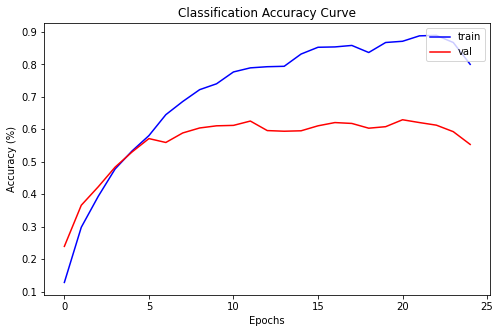

In [ ]:
plot_accuracy(model_history9)
plt.show()

MyCNN Model - Dropout & Early Stopping & Data Augmentation

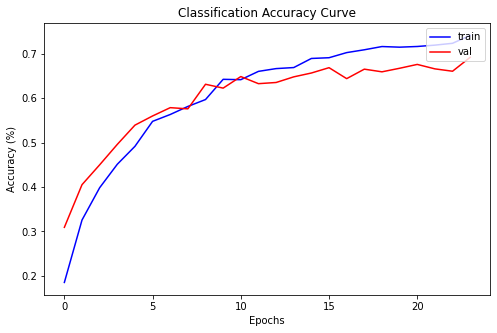

In [ ]:
plot_accuracy(model_history10)
plt.show()

MyCNN Model - Dropout, Early Stopping

In [ ]:
print('Validation set Evaluation metrics')
loss, accuracy = mycnn3.evaluate(x_val, y_val)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))
print("\n")
print('Test set Evaluation metrics')
loss, accuracy = mycnn3.evaluate(x_test, y_test)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))

Validation set Evaluation metrics
47/47 [==============================] - 1s 6ms/step - loss: 5.8416 - accuracy: 0.5533
Loss: 5.84
Accuracy: 0.55


Test set Evaluation metrics
63/63 [==============================] - 1s 9ms/step - loss: 5.9153 - accuracy: 0.5515
Loss: 5.92
Accuracy: 0.55


MyCNN Model - Dropout, Early Stopping, Data Augmentation

In [ ]:
print('Validation set Evaluation metrics')
loss, accuracy = mycnn4.evaluate(data_generator.flow(x_val, y_val_aug, batch_size=128))
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))
print("\n")
print('Test set Evaluation metrics')
loss, accuracy = mycnn4.evaluate(data_generator.flow(x_test, y_test_aug, batch_size=128))
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))

Validation set Evaluation metrics
12/12 [==============================] - 1s 66ms/step - loss: 1.2190 - accuracy: 0.6753
Loss: 1.22
Accuracy: 0.68


Test set Evaluation metrics
16/16 [==============================] - 1s 91ms/step - loss: 1.0855 - accuracy: 0.6880
Loss: 1.09
Accuracy: 0.69


### **Ερώτημα 3**

#### **Βήμα 1: Μεταφορά γνώσης**
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (MyCNN), που αξιολογήσατε ως καλύτερο προς την ορθότητα στην αντιμετώπιση της υπερεκπαίδεσης. 

Για το transfer learning, επιλέξτε το [VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16) για μεταφορά μάθησης.

1. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

2. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

3. Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

#### **Transfer Learning 1: Load Pretrained Model and Freeze Convolutional Base**

Πρώτα, γίνεται φόρτωση της κεφαλής του προεκπαιδευμένου νευρωνικού Δικτύου και μετά πάγωμα των βαρών της. Μετά, ενσωματώνεται η κεφαλή του MyCNN και εκπαιδεύονται μόνο τα βάρη της.

In [ ]:
pretrained_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(32,32,3),pooling=max, classes=classes_num)

pretrained_model.trainable=False # Freeze Weights

58900480/58889256 [==============================] - 1s 0us/step


Combination of Pretrained Model with MyCNN

In [ ]:
def transfer_model():
    
    model = models.Sequential([pretrained_model])
    model.add(layers.Flatten()),
    model.add(layers.Dense(1024)),
    model.add(tf.keras.layers.LeakyReLU()),
    model.add(layers.Dropout(0.15)),
    model.add(layers.Dense(200))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.Dropout(0.18))
    model.add(layers.Dense(classes_num, activation='softmax'))
    model.add(layers.Dropout(0.2))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.summary()
    
    return model

In [ ]:
transfer_model1 = transfer_model()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_10 (Flatten)        (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 1024)              525312    
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dropout_16 (Dropout)        (None, 1024)              0         
                                                                 
 dense_31 (Dense)            (None, 200)               205000    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 200)             

Train Model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_history11 = transfer_model1.fit(data_generator.flow(x_train, y_train_aug, batch_size=128), steps_per_epoch=len(x_train)/128, epochs=25, 
                                      validation_data=data_generator.flow(x_val, y_val_aug, batch_size=128), validation_steps = len(x_val)/128, callbacks=callback)

transfer_model1.save('transfer1.h5')

Epoch 1/25
66/66 [==============================] - 8s 95ms/step - loss: 4.6481 - accuracy: 0.3351 - val_loss: 1.6033 - val_accuracy: 0.5067
Epoch 2/25
66/66 [==============================] - 5s 77ms/step - loss: 4.3603 - accuracy: 0.4426 - val_loss: 1.5206 - val_accuracy: 0.5140
Epoch 3/25
66/66 [==============================] - 5s 80ms/step - loss: 4.4039 - accuracy: 0.4607 - val_loss: 1.5053 - val_accuracy: 0.5260
Epoch 4/25
66/66 [==============================] - 5s 80ms/step - loss: 4.1799 - accuracy: 0.4815 - val_loss: 1.4621 - val_accuracy: 0.5393
Epoch 5/25
66/66 [==============================] - 5s 80ms/step - loss: 4.1179 - accuracy: 0.4931 - val_loss: 1.4668 - val_accuracy: 0.5387
Epoch 6/25
66/66 [==============================] - 5s 79ms/step - loss: 4.0769 - accuracy: 0.5074 - val_loss: 1.4772 - val_accuracy: 0.5327
Epoch 7/25
66/66 [==============================] - 5s 81ms/step - loss: 4.1127 - accuracy: 0.5101 - val_loss: 1.4203 - val_accuracy: 0.5693
Epoch 8/25
66

#### **Transfer Learning 2: Train only a partion of outer layers**

Έπειτα, γίνεται απόπειρα εκπαίδευσης μόνο ενός ποσοστού επιπέδων του ΝΝ που βρίσκεται κοντά στην έξοδο του.

In [ ]:
def transfer_model2():
    
    model = models.Sequential([pretrained_model])
    model.add(layers.Flatten()),
    model.add(layers.Dense(1024, trainable=False)),
    model.add(tf.keras.layers.LeakyReLU()),
    model.add(layers.Dropout(0.15)),
    model.add(layers.Dense(200))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(layers.Dropout(0.18))
    model.add(layers.Dense(classes_num, activation='softmax'))
    model.add(layers.Dropout(0.2))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.summary()
    
    return model

In [ ]:
transfer_model2 = transfer_model2()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_11 (Flatten)        (None, 512)               0         
                                                                 
 dense_33 (Dense)            (None, 1024)              525312    
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dropout_19 (Dropout)        (None, 1024)              0         
                                                                 
 dense_34 (Dense)            (None, 200)               205000    
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 200)             

Εδώ, γίνεται φόρτωση των προεκπαιδευμένων βαρών για το 3ο από το τέλος Dense Layer του Νευρωνικού και μετά πάγωμα της εκπαίδευσής του, επιτρέποντας την εκπάιδευση μόνο των δύο κοντινότερων προς την έξοδο layers.

In [ ]:
weights = transfer_model1.layers[-8].get_weights()  
transfer_model2.layers[-8].set_weights(weights)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_history12 = transfer_model2.fit(data_generator.flow(x_train, y_train_aug, batch_size=128), steps_per_epoch=len(x_train)/128, epochs=25, 
                                      validation_data=data_generator.flow(x_val, y_val_aug, batch_size=128), validation_steps = len(x_val)/128, callbacks=callback)

transfer_model2.save('transfer2.h5')

Epoch 1/25
66/66 [==============================] - 6s 87ms/step - loss: 4.3028 - accuracy: 0.4342 - val_loss: 1.4289 - val_accuracy: 0.5560
Epoch 2/25
66/66 [==============================] - 5s 83ms/step - loss: 4.0831 - accuracy: 0.5092 - val_loss: 1.4076 - val_accuracy: 0.5747
Epoch 3/25
66/66 [==============================] - 6s 84ms/step - loss: 3.9126 - accuracy: 0.5346 - val_loss: 1.3898 - val_accuracy: 0.5787
Epoch 4/25
66/66 [==============================] - 5s 79ms/step - loss: 3.8927 - accuracy: 0.5429 - val_loss: 1.3802 - val_accuracy: 0.5833
Epoch 5/25
66/66 [==============================] - 5s 82ms/step - loss: 3.9533 - accuracy: 0.5394 - val_loss: 1.3933 - val_accuracy: 0.5727
Epoch 6/25
66/66 [==============================] - 5s 80ms/step - loss: 3.9412 - accuracy: 0.5465 - val_loss: 1.3773 - val_accuracy: 0.5773
Epoch 7/25
66/66 [==============================] - 5s 81ms/step - loss: 3.9775 - accuracy: 0.5388 - val_loss: 1.4311 - val_accuracy: 0.5673


#### **Transfer Learning 3: Evaluation**

Τέλος, γίνεται η αξιολόγηση των παραπάνω μοντέλων ως προς την ορθότητα τους στο validation και test set.

Freeze Weights of VGG16

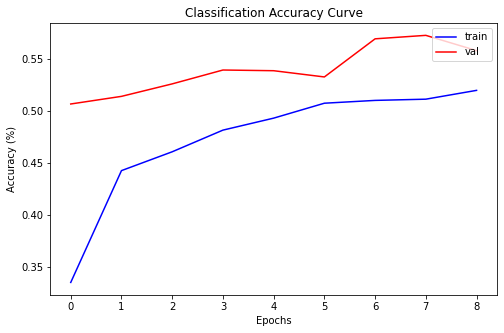

In [ ]:
plot_accuracy(model_history11)
plt.show()

Freeze Weights of VGG16 and Third to Last Dense Layer

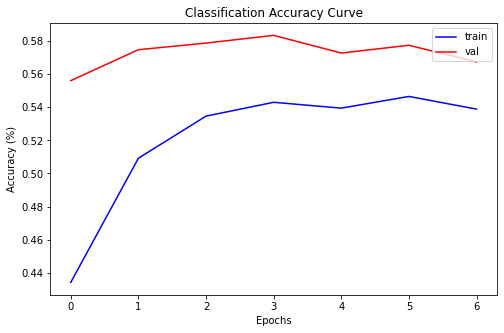

In [ ]:
plot_accuracy(model_history12)
plt.show()

Transfer Learning - 1st Model

In [ ]:
print('Validation set Evaluation metrics')
loss, accuracy = transfer_model1.evaluate(data_generator.flow(x_val, y_val_aug, batch_size=128))
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))
print("\n")
print('Test set Evaluation metrics')
loss, accuracy = transfer_model1.evaluate(data_generator.flow(x_test, y_test_aug, batch_size=128))
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))

Validation set Evaluation metrics
12/12 [==============================] - 1s 65ms/step - loss: 1.4338 - accuracy: 0.5593
Loss: 1.43
Accuracy: 0.56


Test set Evaluation metrics
16/16 [==============================] - 2s 106ms/step - loss: 1.4161 - accuracy: 0.5645
Loss: 1.42
Accuracy: 0.56


Transfer Learning - 2nd Model

In [ ]:
print('Validation set Evaluation metrics')
loss, accuracy = transfer_model2.evaluate(data_generator.flow(x_val, y_val_aug, batch_size=128))
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))
print("\n")
print('Test set Evaluation metrics')
loss, accuracy = transfer_model2.evaluate(data_generator.flow(x_test, y_test_aug, batch_size=128))
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))

Validation set Evaluation metrics
12/12 [==============================] - 1s 63ms/step - loss: 1.4258 - accuracy: 0.5800
Loss: 1.43
Accuracy: 0.58


Test set Evaluation metrics
16/16 [==============================] - 1s 63ms/step - loss: 1.4316 - accuracy: 0.5660
Loss: 1.43
Accuracy: 0.57


**Σχολιασμός**

---

Παρατηρείται ότι η χρήση προεκπαιδευμένων μοντέλων κάνει γρηγορότερη την εκπαίδευση και την σύγκλιση του ΝΝ χωρίς να επιβαρύνεται το τελικό ποσοστό accuracy. Μάλιστα, με το πάγωμα των βαρών ενός τμήματος επιπέδων που βρίσκονται κοντά στην έξοδο του δικτύου, προκύπτουν λίγο καλύτερα ποσοστά ευστοχίας. Αυτό οφείλεται στο γεγονός ότι αξιοποιείται η συνελικτική βάση μοντέλων που έχουν αποδεδειγμένα υψηλά ποσοστά ευστοχίας σε προβλήματα image classification και έτσι, τροποιείταί μόνο η κεφαλή του δικτύου με βάση το εκάσοτε πρόβλημα, μειώνοντας έτσι χρόνο εκπαίδευσης.

**THE END**